In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky 
from matplotlib import cm
from astropy.io import ascii, fits
import astropy.coordinates as coord
import astropy.table as atpy
import astropy.units as u
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from astropy.visualization import make_lupton_rgb
import random 

In [3]:
# set paths to maps
path90 = "/Volumes/SeaGate 1/ACT/act_dr5.01_s08s18_AA_f090_daynight_map.fits"
path150 = "/Volumes/SeaGate 1/ACT/act_dr5.01_s08s18_AA_f150_daynight_map.fits"
path220 = "/Volumes/SeaGate 1/ACT/act_dr5.01_s08s18_AA_f220_daynight_map.fits"

In [15]:
f90 = fits.open(path90)
f90.info()

Filename: /Volumes/SeaGate 1/ACT/act_dr5.01_s08s18_AA_f090_daynight_map.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FREQ-MAP      1 PrimaryHDU      45   (43200, 10320, 3)   float32   


In [50]:
data.shape

(3, 10320, 43200)

In [4]:
def eshow(x,**kwargs): 
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

In [5]:
ra_from, ra_to = np.deg2rad([225, 240])
dec_from, dec_to = np.deg2rad([10, 25])

box = [[dec_from,ra_from],[dec_to,ra_to]]

imap90 = enmap.read_map(path90, box = box)
imap150 = enmap.read_map(path150, box = box)
imap220 = enmap.read_map(path220, box = box)

In [527]:
imap90[0].shape

(600, 43200)

In [23]:
freqs = [(imap90, 90), (imap150, 150), (imap220, 220)]

In [6]:
tab = atpy.Table().read('DR5_cluster-catalog_v1.1.fits')
ras = tab['RADeg']
decs = tab['decDeg']
mass = tab['M500c']
dist = tab['redshift']
df = pd.DataFrame(dict(
    Ra = list(ras),
    Dec = list(decs),
    Mass500 = list(mass),
    RedShift = list(dist)
))
df

Ra        Dec   Mass500  RedShift
0       0.020898 -38.626732  1.696723  0.300599
1       0.060601 -43.955494  2.457475  0.878131
2       0.089900 -28.091249  2.730490  0.282570
3       0.083333 -39.604169  1.490711  0.356218
4       0.113533  -1.044811  1.516593  0.438800
...          ...        ...       ...       ...
4190  359.727531 -43.905169  2.639904  0.734463
4191  359.887357   2.138787  2.722980  0.429373
4192  359.889739 -46.143628  1.461240  1.223600
4193  359.929865 -50.169857  2.980008  0.775000
4194  359.988274 -32.943636  2.163558  0.686000

[4195 rows x 4 columns]

In [7]:
fig = px.scatter(df, x='Mass500', y='RedShift', hover_name=df.index.tolist(), hover_data=["Dec", "Ra"],)
fig.show()

In [13]:
tmp = df.loc[(df['Ra'] > 225) & (df['Ra'] < 240) & (df['Dec'] > 13) & (df['Dec'] < 25)]
glx = tmp.sort_values('Mass500')[::-1].head(5)
glx

Ra        Dec   Mass500  RedShift
3210  236.849117  17.284224  4.028956    0.4140
3136  231.823565  16.002951  3.377854    1.0196
3189  235.004230  17.935832  3.299695    0.3860
3129  231.461936  15.681922  3.286092    1.0200
3134  231.678238  16.791626  3.116408    0.3450

In [18]:
width = 30/60.

(360, 360)


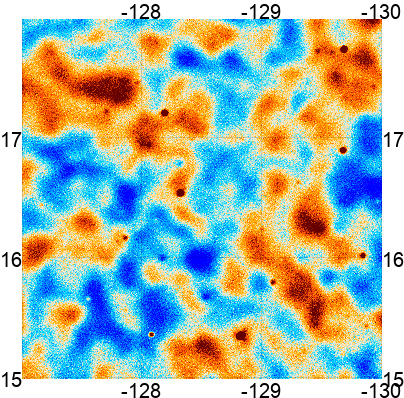

In [11]:
# fig, axs = plt.subplots(1, 1, figsize=(8, 6))    
width = 3
ra, dec = 231.5, 16.5
box = np.deg2rad([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
res = imap90[0].submap(box)
# print(res.shape)
# print(tmp['RedShift'].iloc[0], tmp['Mass500'].iloc[0])
print(res.shape)
eshow(res)

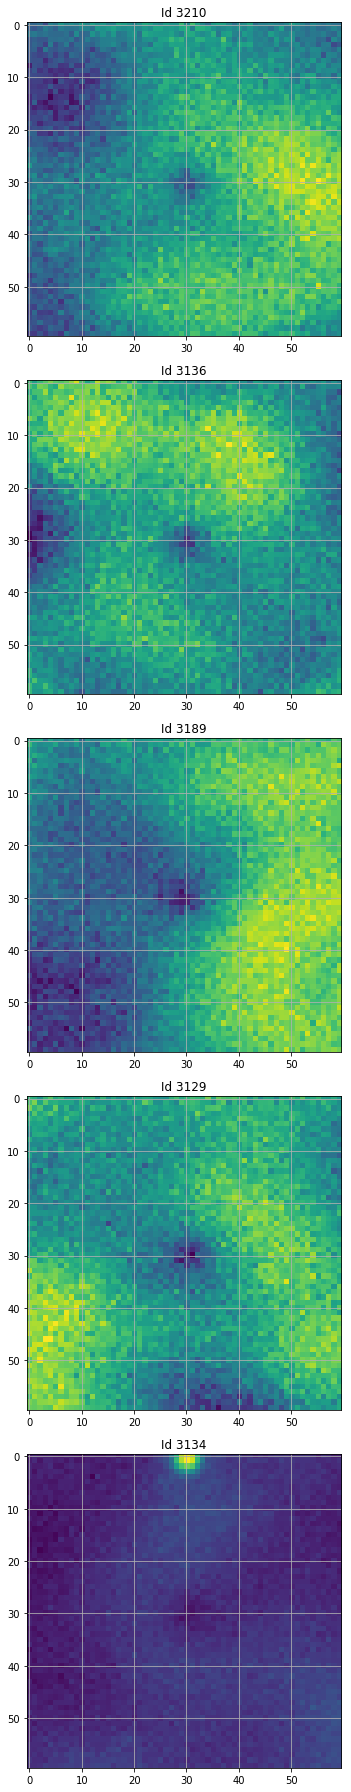

In [19]:
fig, axs = plt.subplots(glx.shape[0], 1, figsize=(30, 25))
for i, obj in enumerate(glx.iterrows()):
    ra, dec = obj[1]['Ra'], obj[1]['Dec']
    box = np.deg2rad([[dec - width / 2.,ra - width / 2.],[dec + width / 2.,ra + width / 2.]])
    fig.tight_layout()
    axs[i].set_title('Id {}'.format(obj[0]))
    res = imap90[0].submap(box)
#     a_circle = plt.Circle((res.shape[0] //2, res.shape[0] //2), 2, color='red')
#     axs[i].add_artist(a_circle)
    axs[i].imshow(res)
    axs[i].grid(True)

In [20]:
print(imap90.shape)
for ind, row in tmp.iterrows():
    fig = plt.figure(frameon=False)
    fig.set_size_inches(2, 2)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    dec, ra = row['Dec'], row['Ra']
    box = np.deg2rad([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
    res = imap90[0].submap(box)
    a_circle = plt.Circle((res.shape[0] // 2, res.shape[0] // 2), 2, color='red')
    ax.add_artist(a_circle)
    ax.imshow(res.submap(box), cmap='gray')
    ax.imshow(res, aspect='auto', cmap='viridis')
    fig.savefig('patches/kek{}.png'.format(ind), dpi=100, pad_inches=0)
    plt.close()

(3, 1800, 1800)


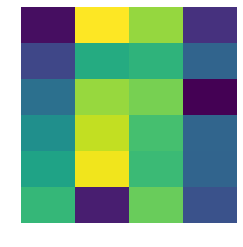

In [499]:
fig1 = plt.figure(frameon=False)
fig1.set_size_inches(3, 3)
ax1 = plt.Axes(fig1, [0., 0., 1., 1.])
ax1.set_axis_off()
fig1.add_axes(ax1)
ax1.imshow(kek, aspect='auto', cmap='viridis')
fig1.savefig('temp.png', dpi=100, pad_inches=0)

228.20023889862745 14.348418947520363
(100, 100)


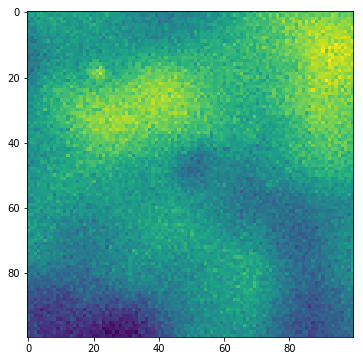

In [566]:
width = 50/60.
fig, axs = plt.subplots(5, 1, figsize=(8, 6))    
ra, dec = df['Ra'].iloc[3088], df['Dec'].iloc[3088]
print(ra, dec)
box = np.deg2rad([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
res = imap90[0].submap(box)
print(res.shape)
axs.imshow(res)

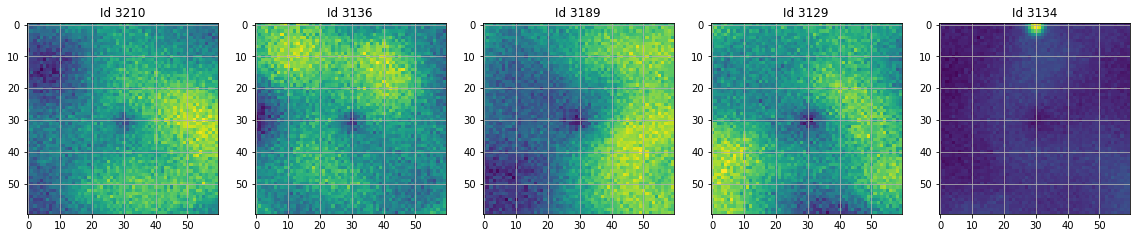

In [44]:
fig, axs = plt.subplots(1, 5, figsize=(16, 15))
for i, obj in enumerate(kek.head(5).iterrows()):
    ra, dec = obj[1]['Ra'], obj[1]['Dec']
    box = np.deg2rad([[dec - width / 2.,ra - width / 2.],[dec + width / 2.,ra + width / 2.]])
    fig.tight_layout()
    axs[i].set_title('Id {}'.format(obj[0]))
    res = imap90[0].submap(box)
#     a_circle = plt.Circle((res.shape[0] //2, res.shape[0] //2), 2, color='red')
#     axs[i].add_artist(a_circle)
    axs[i].imshow(res)
    axs[i].grid(True)

In [162]:
galaxies
k = galaxies[0] - 1
decs[k], ras[k]
coords = np.deg2rad(np.array((dec,ra)))
print(imap90.shape)
ypix,xpix = enmap.sky2pix(imap90.shape, imap90.wcs, coords)
print(ypix, xpix)

(3, 7200, 8400)
3258.688670072377 6088.5220838913665


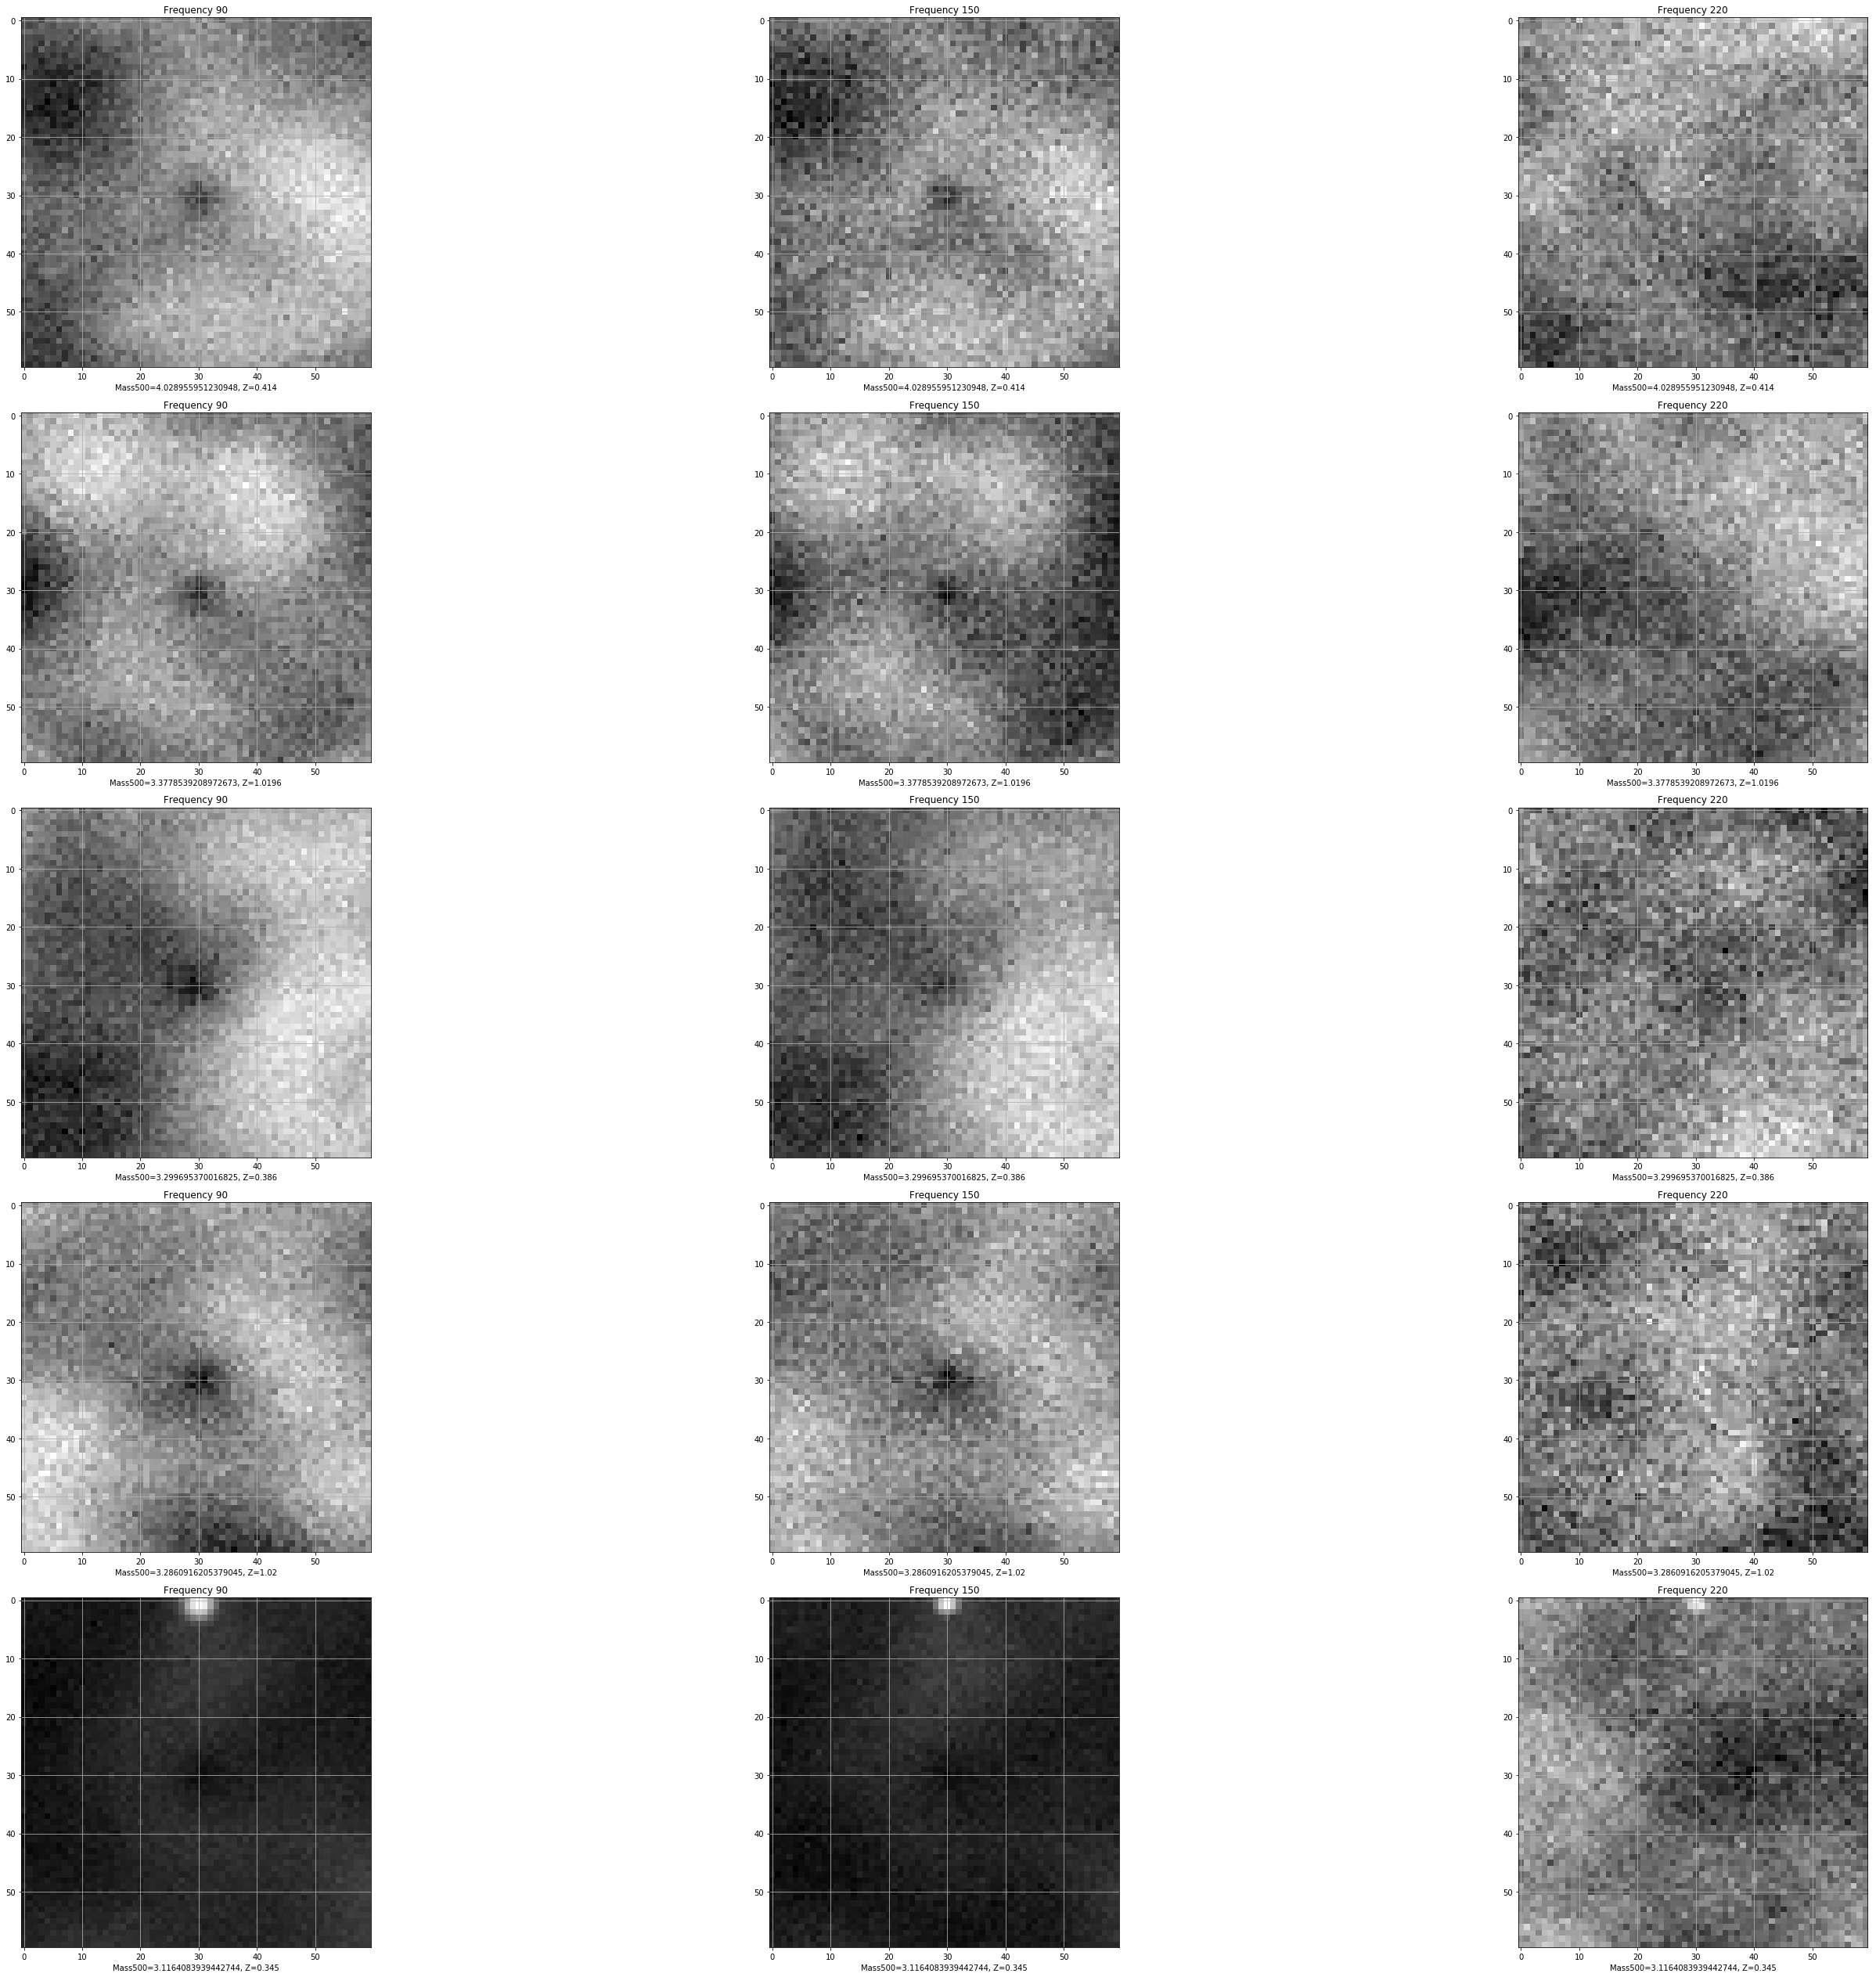

In [50]:
width = 30/60
fig, axs = plt.subplots(len(glx), 3, figsize=(40, 35))
for i, obj in enumerate(glx.iterrows()):
    ra, dec = obj[1]['Ra'], obj[1]['Dec']
    box = np.deg2rad([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
    fig.tight_layout()
    for j, imap in enumerate(freqs):
        axs[i][j].imshow(imap[0][0].submap(box), cmap='gray')
        axs[i][j].set_title('Frequency {}'.format(imap[1]))
        axs[i][j].set_xlabel("Mass500={}, Z={}".format(obj[1]['Mass500'], obj[1]['RedShift']))
        axs[i][j].grid(True)

Text(0.5, 0, 'Degrees')

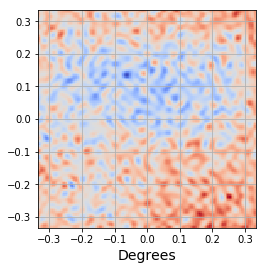

In [107]:
r_arcmin = 10.  #Define the radius of the image in arcminutes
r = r_arcmin*np.pi/(60 * 180)  # convert arcminutes to radiagalaxies 

stamp = reproject.thumbnails(imap90, coords = np.deg2rad([decs[n], ras[n]]), res =  0.0000454440, r = r)


extent = [-r_arcmin/30., r_arcmin/30., -r_arcmin/30., r_arcmin/30.]
plt.imshow(stamp[0], extent=extent,cmap = cm.coolwarm)
plt.grid(True)
plt.xlabel("Degrees", fontsize = 14)

Text(0.5, 0, 'Degrees')

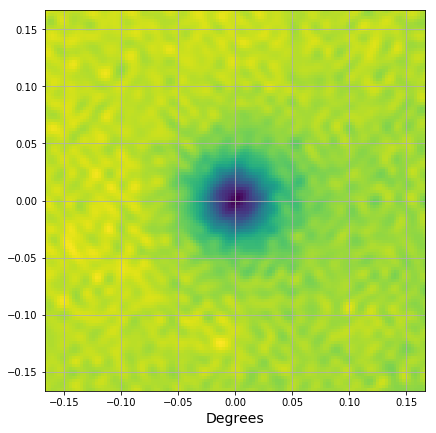

In [95]:
stamps = reproject.thumbnails(imap90[0], coords=np.deg2rad([decs,ras]).T, res=0.0000454440, r=r)
stack = np.mean(stamps,0)

plt.figure(figsize = (7,7))
plt.imshow(stack, extent = extent)
plt.grid(True)
plt.xlabel("Degrees", fontsize = 14)